# ランダムフォレスト回帰のテスト
[参考]  
http://tekenuko.hatenablog.com/entry/2016/09/20/222453

In [1]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_boston
# データのロード、マージ
boston = load_boston()
df = DataFrame(boston.data, columns = boston.feature_names)
df['MEDV'] = np.array(boston.target)

In [2]:
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [16]:
df.index

RangeIndex(start=0, stop=506, step=1)

In [4]:
# 説明変数、目的変数
X = df.iloc[:, :-1].values
y = df.loc[:, 'MEDV'].values
# 学習用、検証用データに分割
from sklearn.cross_validation import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size = 0.3, random_state = 666)

/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [24]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [5]:
# 必要なライブラリのインポート
from sklearn.ensemble import RandomForestRegressor
# モデル構築、パラメータはデフォルト
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [10]:
X_train

array([[5.78900e-02, 1.25000e+01, 6.07000e+00, ..., 1.89000e+01,
        3.96210e+02, 8.10000e+00],
       [4.66883e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.04800e+01, 1.90100e+01],
       [2.00849e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        2.85830e+02, 3.06300e+01],
       ...,
       [9.33889e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        6.07200e+01, 2.40800e+01],
       [2.43938e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.96900e+02, 2.82800e+01],
       [5.20580e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.88450e+02, 9.54000e+00]])

In [12]:
X_test

array([[4.46200e-02, 2.50000e+01, 4.86000e+00, ..., 1.90000e+01,
        3.95630e+02, 7.22000e+00],
       [8.24809e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75870e+02, 1.67400e+01],
       [7.90410e-01, 0.00000e+00, 9.90000e+00, ..., 1.84000e+01,
        3.96900e+02, 5.98000e+00],
       ...,
       [4.41780e-01, 0.00000e+00, 6.20000e+00, ..., 1.74000e+01,
        3.80340e+02, 3.76000e+00],
       [2.06080e-01, 2.20000e+01, 5.86000e+00, ..., 1.91000e+01,
        3.72490e+02, 1.25000e+01],
       [1.27440e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.85410e+02, 4.84000e+00]])

In [13]:
y_train

array([22. , 12.7,  8.8, 13.3, 24.3, 20. , 19.8, 16.4, 24.8, 21.2, 10.4,
       21.2, 19.2, 30.7, 27.1, 23.3, 22.2, 27. , 18.2, 17.7, 19.8,  7.4,
       22.4, 18.1, 18.6, 10.5, 20. , 19.9, 23.5, 23.1, 19.3, 24.7, 21.6,
       48.3, 11.7, 41.7, 14.3, 21.5, 13.6, 13.8, 20.4, 18.5, 37.6, 23.7,
       17.3, 16.5, 31.6, 16.2, 24.3, 34.9, 19.5, 17.1, 27.5, 50. , 23.1,
       36. , 50. , 22. , 22. , 17.1, 23. , 18.5, 24.1, 21.4,  9.6, 13.3,
       22.8, 21.9, 19.4, 21.6, 23.8, 21.7, 11.3,  7.5, 24.4, 28.1, 17.5,
       20.7, 39.8, 12.8,  7.2, 50. , 13.4, 44.8, 15.3, 21.7, 18.2, 14.9,
       34.6, 22.9, 25. , 20.1, 34.9, 35.2, 22.2, 19.4, 21.9,  8.8, 13.1,
       28.7, 44. , 24.5, 20.1, 11.9, 31.5, 21.8, 50. , 22.2, 25.2, 21.2,
       50. , 11. , 22.6, 50. , 13.4, 27.9, 31.2, 23.8, 43.8, 29.8, 14.1,
       34.9, 14. , 29.1, 19.5, 21.7, 14.3, 21.7, 26.7, 19.7, 23.3, 16.3,
       10.2,  8.4, 19.6, 29.8, 23.2, 50. , 28.4, 23.6, 24.6, 20.8, 50. ,
       20. ,  8.5, 23. , 15.6,  5. , 17.4, 20.6, 20

In [14]:
y_test

array([23.9, 17.8, 22.1, 37.3, 25. , 19.7, 16.2, 18.9, 29.6, 18.4,  8.4,
       24.7, 19.8, 15.4, 22.2, 23.3, 26.6, 15.6, 12.6, 28.4, 37. ,  8.3,
        7.2, 46.7, 26.5, 19.4, 24.5, 15.6, 37.9, 33. , 43.5,  7. , 24.8,
       22.5, 19.4, 20.3, 31. , 30.1, 21. , 13.5, 24.4, 11.9, 24.5, 20.8,
       23.7, 10.8, 23.7, 33.1, 22.9, 19.1, 22.3, 32. , 15. , 20.3, 20.6,
       20.4, 17.2, 19.9, 17.8, 14.5, 19.6, 23.9, 24. , 14.2, 15.2, 12. ,
       22. , 22.6, 17.4, 25. ,  5. , 31.7, 19.6, 23.2, 45.4, 18.9,  7.2,
       23.1, 19.5, 35.4, 28.2, 23.4,  9.7, 29.9, 32.9, 17. , 18.9, 27.5,
       17.5, 50. , 19.1, 33.3, 24.4, 37.2, 18.8, 14.5, 22.8, 22. , 13.9,
       17.9, 18. , 10.9, 23.2, 19. , 17.5, 26.4, 20.2, 21.5, 21.2, 19.4,
       38.7, 21.4, 23.1, 10.9, 20.1, 29.6, 13.6, 11.5, 33.4, 16. , 24.3,
       23.2, 21. ,  6.3,  8.3, 32. , 13.1, 23.9, 16.5, 14.9, 13.9, 26.4,
       23.7, 36.2, 42.8, 32.7, 25. , 33.4, 36.2, 32.2, 25. , 14.4, 35.1,
       20.1, 24. , 24.7, 21.4, 19.1, 15.4, 31.5, 17

In [20]:
# 予測値を計算
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 2.964, test : 14.072
MSE train : 0.967, test : 0.803


In [21]:
y_train_pred

array([21.18, 13.5 ,  9.54, 13.17, 22.56, 19.41, 20.06, 15.57, 24.22,
       20.56,  9.54, 21.09, 18.49, 31.98, 20.97, 24.37, 21.22, 26.07,
       17.98, 18.31, 19.58,  9.01, 23.44, 17.77, 20.1 , 10.93, 20.48,
       20.24, 23.27, 23.77, 20.09, 22.92, 21.4 , 45.55, 13.85, 42.61,
       15.47, 21.16, 14.03, 13.88, 21.07, 19.25, 40.63, 20.39, 17.14,
       16.67, 34.11, 17.97, 23.91, 33.49, 19.12, 18.11, 18.93, 49.19,
       22.66, 36.79, 49.17, 21.59, 22.61, 18.3 , 22.68, 19.08, 24.43,
       21.45, 10.52, 13.54, 26.27, 24.71, 19.5 , 21.34, 22.53, 21.49,
       11.65,  8.94, 25.84, 26.67, 19.04, 20.88, 39.81, 12.82,  8.07,
       38.91, 13.65, 42.76, 18.37, 20.55, 19.12, 14.79, 34.32, 22.32,
       24.88, 19.97, 34.43, 37.91, 21.77, 18.77, 22.4 ,  9.71, 13.1 ,
       28.27, 42.42, 23.26, 20.18, 12.37, 33.53, 21.19, 46.12, 21.44,
       26.35, 21.18, 46.02, 10.65, 23.24, 46.08, 13.23, 36.74, 31.01,
       24.2 , 44.42, 29.57, 17.01, 34.72, 14.2 , 28.28, 20.22, 21.29,
       13.91, 21.34,

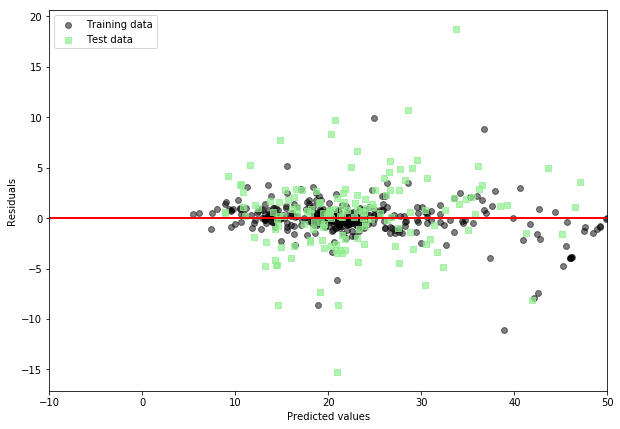

In [25]:
# matplotlibを呼び出し、あとおまじない
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (10, 7))
plt.scatter(y_train_pred, y_train_pred - y_train, c = 'black', marker = 'o', s = 35, alpha = 0.5, label = 'Training data')
plt.scatter(y_test_pred, y_test_pred - y_test, c = 'lightgreen', marker = 's', s = 35, alpha = 0.7, label = 'Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc = 'upper left')
plt.hlines(y = 0, xmin = -10, xmax = 50, lw = 2, color = 'red')
plt.xlim([-10, 50])
plt.show()

In [26]:
# 必要なライブラリのインポート
from sklearn.grid_search import GridSearchCV
# 動かすパラメータを明示的に表示、今回は決定木の数を変えてみる
params = {'n_estimators'  : [3, 10, 100, 1000, 10000], 'n_jobs': [-1]}

/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [27]:
# モデルにインスタンス生成
mod = RandomForestRegressor()
# ハイパーパラメータ探索
cv = GridSearchCV(mod, params, cv = 10, scoring= 'mean_squared_error', n_jobs =1)
cv.fit(X_train, y_train)

/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mea

/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/arakei/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mea

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [3, 10, 100, 1000, 10000], 'n_jobs': [-1]},
       pre_dispatch='2*n_jobs', refit=True, scoring='mean_squared_error',
       verbose=0)

In [31]:
# 予測値を計算
y_train_pred = cv.predict(X_train)
y_test_pred = cv.predict(X_test)
# MSEの計算
from sklearn.metrics import mean_squared_error
print('MSE train : %.3f, test : %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)) )
# R^2の計算
from sklearn.metrics import r2_score
print('MSE train : %.3f, test : %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)) )

MSE train : 1.754, test : 13.308
MSE train : 0.981, test : 0.813


In [32]:
print(cv.best_score_)  # 最も良かったスコア
print(cv.best_params_)  # 上記を記録したパラメータの組み合わせ

-12.211282088179855
{'n_estimators': 10000, 'n_jobs': -1}
